## Project ECG - step 1
Read project_ecg_step_1.pdf and 1D_Signal_Processing_Peak_Detection.ipynb

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.ndimage

Load the ECG data from ecg_data1.csv using pandas <br>
The ipynb file and the data file ecg_data1.csv should be in the same file folder  <br>
the ECG signal should be stored in a numpy array  <br>
the Sampling Rate is known to be 1000Hz  <br>

In [11]:
# load data from ecg_data1.csv using pandas
# Get the 'Amp' volume and convert it to a numpy array x
data = pd.read_csv('ecg_data1.csv')
data.head()


,Amp
0,2044.0
1,2044.0
2,2044.0
3,2044.0
4,2044.0


## Project ECG - step 1
Read project_ecg_step_1.pdf and 1D_Signal_Processing_Peak_Detection.ipynb

In [12]:
#check missing values
data.isnull().sum()

Amp    0
dtype: int64

In [13]:
#get the signal and convert it to numpy array
x = data['Amp'].values
type(x)

numpy.ndarray

In [14]:
#some parameters of the signal
fs = 1000 # sampling rate (Hz)
Ts = 1/fs # sampling intervel (seconds)
N = x.shape[0] # total number of data points in the ECG signal x (15000)
Duration= N/fs #seconds (15000 / 1000 = 15 seconds)

### Your task begins here
the outputs of your code cells should closely match thoses (figures, curves, etc) in this template

Visualize the ECG signal x

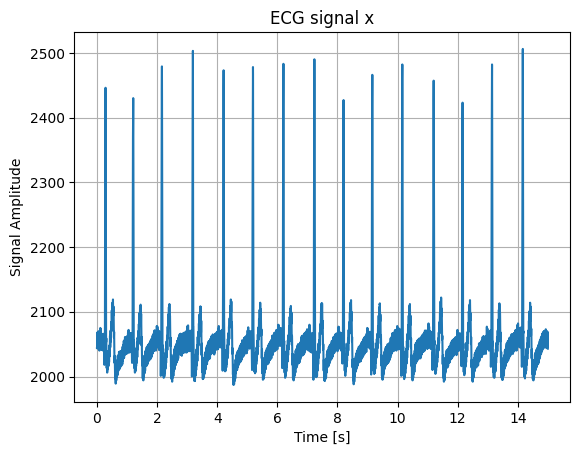

In [15]:
#code
t = np.linspace(0, Duration - Ts, N)

fig, ax = plt.subplots()
ax.plot(t, x, '-')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Amplitude")
ax.set_title("ECG signal x")
ax.grid(True)

Build a GaussianKernel for smoothing the ECG signal x <br>
you may need to adjust the parameters of this kernel

Text(0.5, 1.0, 'GaussianKernel')

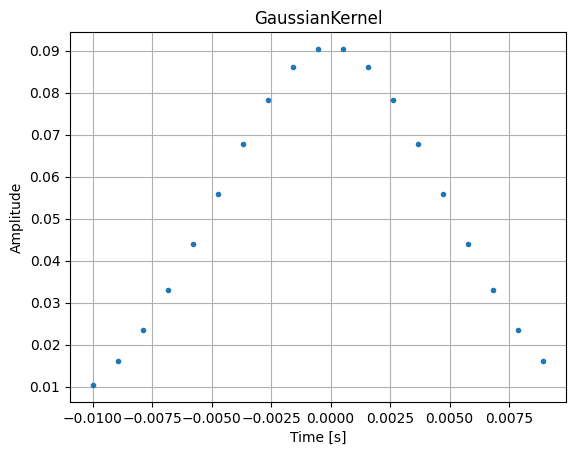

In [16]:
#code
tg = np.linspace(-0.01, 0.01, 19, endpoint=False)
sigma = 0.0048 # Current best = 0.0048
GaussianKernel = np.exp(-tg**2/(2*sigma**2))
GaussianKernel /= GaussianKernel.sum() # Normalization to ensure all points sum up to 1
# plot the kernel
fig, ax = plt.subplots()
ax.plot(tg, GaussianKernel, '.')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")
ax.grid(True)
ax.set_title("GaussianKernel")
# ax.set_xlim([-0.01, 0.01])

Smooth the ECG signal `x` using cross-correlation (correlate) with GaussianKernel <br>
Name the smoothed signal `x_smoothed` <br>
Visualize the smoothed signal `x_smoothed` and the original signal `x` in a figure

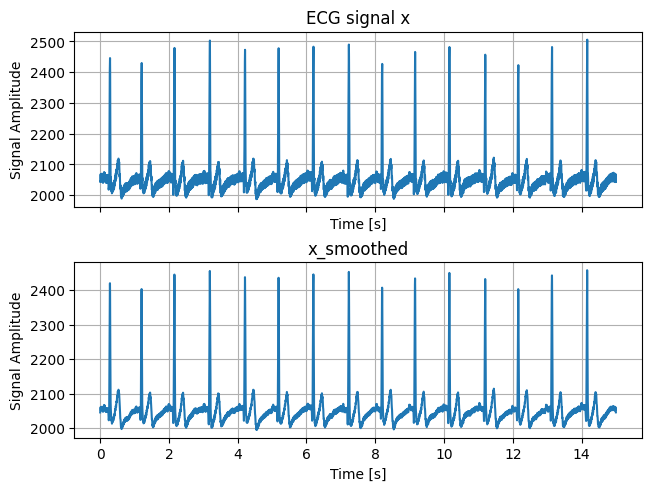

In [17]:
#code
x_smoothed = scipy.ndimage.correlate(x, GaussianKernel, mode='nearest')
fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x, '-')
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Signal Amplitude")
ax[0].set_title("ECG signal x")
ax[0].grid(True)

ax[1].plot(t, x_smoothed, '-')
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("Signal Amplitude")
ax[1].set_title("x_smoothed")
ax[1].grid(True)

Perform peak detection on x_smoothed, using two kernels: h1 and h2 <br>

In [18]:
#code
def peak_detector(x):
    # two kernels
    h1 = [-1, 1, 0]
    h2 = [0, 1, -1]
    y = scipy.ndimage.correlate(x, h1, mode="nearest")
    z = scipy.ndimage.correlate(x, h2, mode="nearest")

    indexArray1 = np.where(y>0)
    indexArray2 = np.where(z>0)
    peakIndexArray = np.intersect1d(indexArray1, indexArray2)

    # peakIndexArray = np.where((y>0) & (z>0))[0]
    return peakIndexArray

peakIndexSmoothed = peak_detector(x_smoothed)

Visualize the ECG signal `x` and the peaks detected from x_smoothed (no need to plot x_smoothed)

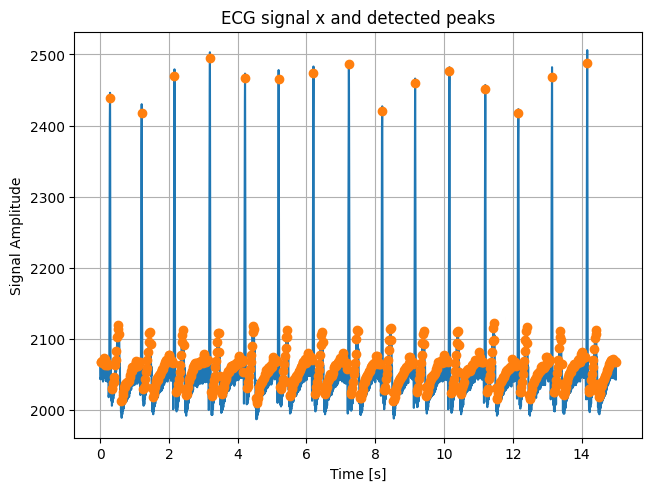

In [19]:
#code
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(t, x, '-')
ax.plot(t[peakIndexSmoothed], x[peakIndexSmoothed], 'o')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Amplitude")
ax.set_title("ECG signal x and detected peaks")
ax.grid(True)

We need to find the R-peaks from the detected peaks<br>
Select the peaks with amplitude values > threshold <br>
Write code to find the threshold <br>
It is NOT acceptable to simply set threshold to a manually defined number (e.g.,  threshold=2000)

In [29]:
#code
# thresholdPercentage = 0.86
# threshold = thresholdPercentage * x[peakIndexSmoothed].max()
# RPeakIndexArray = peakIndexSmoothed[x[peakIndexSmoothed] > threshold]
# threshold
from skimage.filters import threshold_otsu
threshold = threshold_otsu(x)
RPeakIndexArray = peakIndexSmoothed[x[peakIndexSmoothed] > threshold]
threshold

2208.994140625

Visualize the R-peaks and the signal `x`

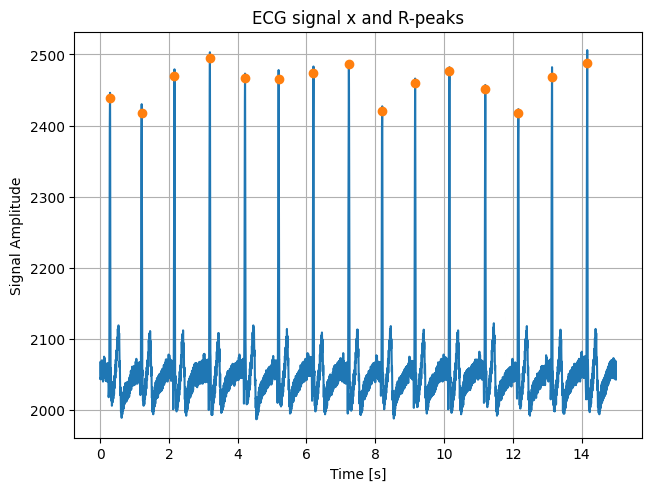

In [30]:
#code
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(t, x, '-')
ax.plot(t[RPeakIndexArray], x[RPeakIndexArray], 'o')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Amplitude")
ax.set_title("ECG signal x and R-peaks")
ax.grid(True)

Calculate heart rate per minute based on the R-peaks and visualize the result

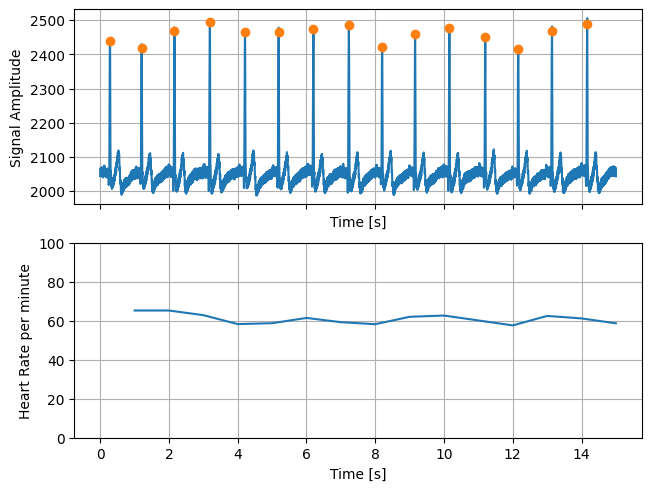

In [31]:
# RPeakIndexArray stores the indexes of the R-peaks in the ECG signal x
# step-1: create a numpy array HeartRate that has the same shape as RPeakIndexArray
# step-2: in a range-based for loop:
#         HeartRate[n]=60*fs/(RPeakIndexArray[n]-RPeakIndexArray[n-1])
#         It should be range(1, RPeakIndexArray.shape[0])
# step-3: set HeartRate[0] to be equal to HeartRate[1]
# step-4: plot the signal x and the HeartRate curve

heartRate = np.zeros(shape=RPeakIndexArray.shape)
for i in range(1, heartRate.shape[0]):
    heartRate[i] = 60 * fs / (RPeakIndexArray[i] - RPeakIndexArray[i - 1])
heartRate[0] = heartRate[1]

fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x, '-')
ax[0].plot(t[RPeakIndexArray], x[RPeakIndexArray], 'o')
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Signal Amplitude")
ax[0].grid(True)

time = np.arange(1, 16)
ax[1].plot(time, heartRate, '-')
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("Heart Rate per minute")
ax[1].set_ylim([0, 100])
ax[1].grid(True)